# 참고

James Kwon, CNN with Keras, Bubble technology is not useless(네이버 블로그)

https://m.blog.naver.com/PostView.nhn?blogId=naininfo&logNo=221565564369&isFromSearchAddView=true

# 문제
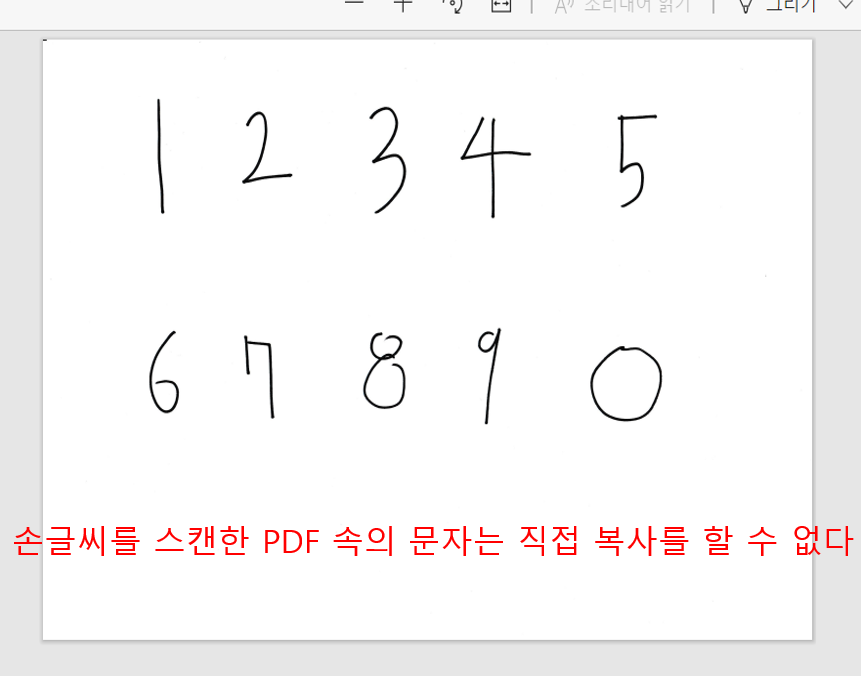

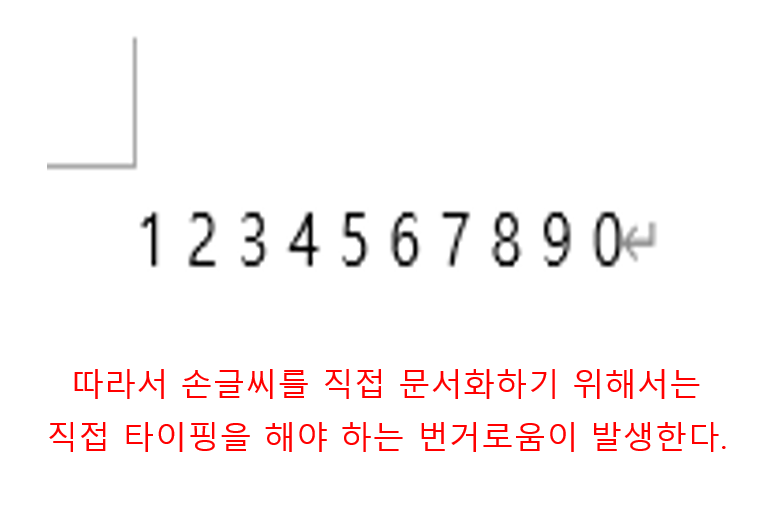

<h3> 이러한 번거로움을 해결할 수 있는 서비스가 바로 <h1>AI기반 문서 인식 자동화 솔루션<h1><h3>이다.

<h3> 하지만 한글의 경우 총 11,172개의 문자로 이루어져 있고 실제 손글씨 데이터를 확보하기란 어렵다고 판단했다.

<h1> 따라서 우선 우리는 6만개의 0~9까지의 숫자 손 글씨가 적힌 MNIST 데이터셋을 활용해 프로젝트의 실현 가능성을 확인했다.

# 사용한 패키지

In [ ]:
# 패키기 불러오기
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

from PIL import Image
import PIL.ImageOps
import numpy as np
import pandas as pd

import random
import matplotlib.pyplot as plt

# 학습용 데이터 셋

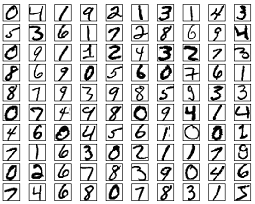

In [ ]:
from IPython.display import Image
Image('https://blobscdn.gitbook.com/v0/b/gitbook-28427.appspot.com/o/assets%2F-LbBOSivlH5hwcpk3QX6%2F-LbhL_FaY3MddySqIHac%2F-LbhM4AcyBV0K9EJAxs4%2F51301.png')

<h3> MNIST 데이터는 위 처럼 0~9로 이루어진 총 60,000개의 손글씨 이미지로 이루어진 데이터셋이다.

In [ ]:
# 데이터 다운로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# 데이터 전처리

In [ ]:
img_rows = 28
img_cols = 28

input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)

x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')

print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# 64개의 가지수를 겹쳐서 학습
batch_size = 64

# 예측 데이터는 0~9까지 총 10개
num_classes = 10

# 12번 학습
epochs = 12 

# 예측 데이터를 범주화 시킴
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 모델 학습

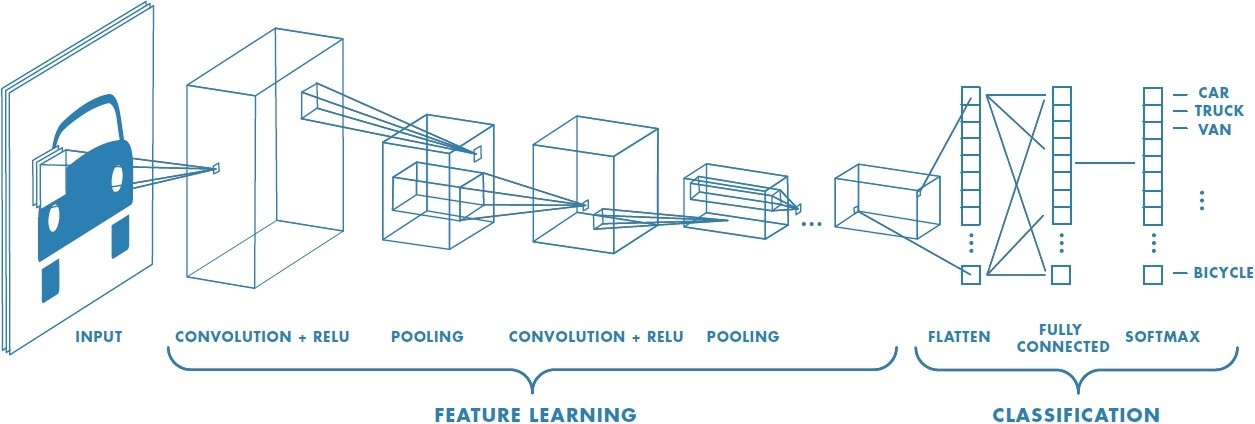

In [ ]:
from IPython.display import Image
Image('https://blobscdn.gitbook.com/v0/b/gitbook-28427.appspot.com/o/assets%2F-LbBOSivlH5hwcpk3QX6%2F-Lc-af7fViPaYm7--aD6%2F-Lc-b99ErE0Jg9G724UA%2F54202.jpg')

## 모델 설명

- <h3> CNN 모델은 Convolutional Neural Network 모델로 딥러닝의 한 종류로써 주로 이미지를 인식하는데 활용되는 모델이다.
- <h3> 위 사진과 동일한 형식의 CNN 모델을 구축

In [ ]:
# 사진과 동일한 형식의 CNN 모델
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [ ]:
# 모델 학습
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
938/938 [==============================] - 11s 5ms/step - loss: 0.3411 - accuracy: 0.8921 - val_loss: 0.0481 - val_accuracy: 0.9842
Epoch 2/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0603 - accuracy: 0.9813 - val_loss: 0.0310 - val_accuracy: 0.9898
Epoch 3/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0297 - val_accuracy: 0.9896
Epoch 4/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0237 - val_accuracy: 0.9915
Epoch 5/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0241 - val_accuracy: 0.9925
Epoch 6/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0225 - val_accuracy: 0.9936
Epoch 7/12
938/938 [==============================] - 4s 4ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0233 - val_accuracy: 0.9923
Epoch

# 모델 학습 결과

- <h3> 약 99%의 정확도를 가짐
- <h3> 16개의 데이터를 시각화 시켰을 때 예측이 제대로 된 것을 확인 가능

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

Test loss: 0.02183297462761402
Test accuracy: 0.9936000108718872


In [ ]:
predicted_result = model.predict(x_test)

predicted_labels = np.argmax(predicted_result, axis=1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
test_labels = np.argmax(y_test, axis=1)

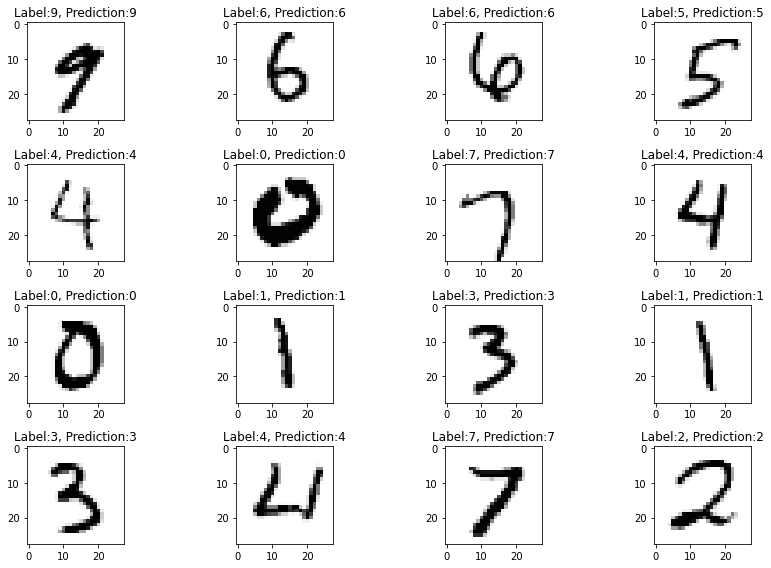

In [ ]:
count = 0
plt.figure(figsize=(12,8))

for n in range(16):
    count += 1

    plt.subplot(4, 4, count)

    plt.imshow(x_test[n+20].reshape(28, 28), cmap='Greys', interpolation='nearest')

    tmp = "Label:" + str(test_labels[n+20]) + ", Prediction:" + str(predicted_labels[n+20])

    plt.title(tmp)

plt.tight_layout()

plt.show()

# 모델 활용

1. PIL 패키지를 활용하여 이미지를 전처리
2. 전처리한 데이터를 학습된 모델에 넣음
3. 모델에서 예측한 값을 반환
4. 예측한 데이터를 txt 파일에 저장

<h3> 예측 결과 9를 제외한 모든 숫자를 제대로 맞췄으며 txt 파일로 자동으로 저장됨

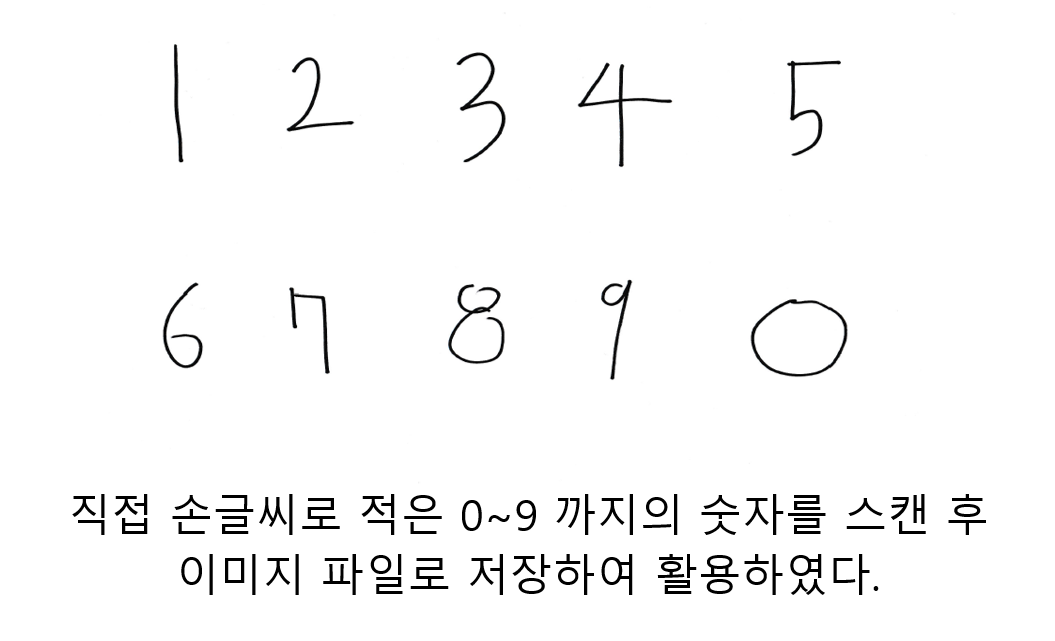

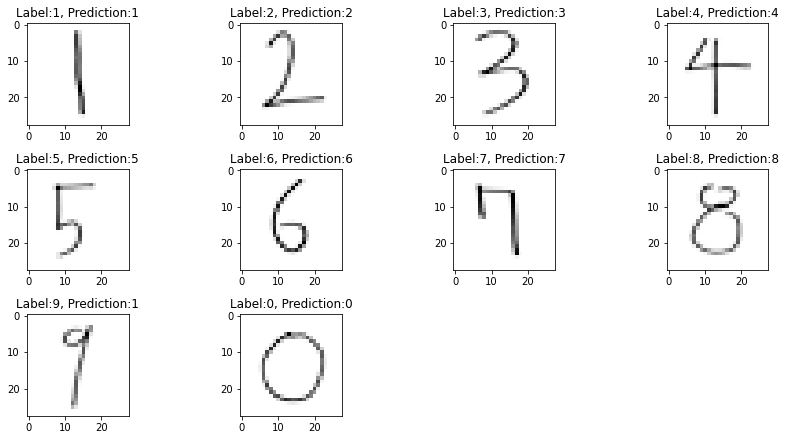

In [ ]:
name = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'zero']
label = [1,2,3,4,5,6,7,8,9,0]

plt.figure(figsize=(12,8))

index = 0
count = 0
with open("result.txt", "w") as f:
  for i in name:
    im = Image.open('/content/drive/MyDrive/Project/AI빅데이터 공모전/data/'+i+'.png') # 이미지 불러오기
    im = im.convert('L') # 흑백이미지로 변환 (배경이 검정색 글자가 흰색)
    im = PIL.ImageOps.invert(im) # 이미지 반전 (배경이 흰색 글자가 검정색)
    im = im.resize((28,28)) # 사이즈를 훈련용데이터와 동일하게 변환

    # 데이터를 숫자 형태로 변환
    pixels = np.array(im.getdata())
    data = pixels.reshape((28,28))

    # 훈련용 데이터와 동일한 형태로 변환
    data = data.reshape((1,28,28,1))
    data = data.astype('float32') / 255

    # 모델에 학습
    pred = model.predict(data)
    # 예측된 값 중 가장 높은 값에 인덱스를 반환(인덱스가 곧 문자의 라벨)
    pred_label = np.argmax(pred, axis=1)

    count += 1

    plt.subplot(4, 4, count)

    plt.imshow(data[0].reshape(28, 28), cmap='Greys', interpolation='nearest')

    tmp = "Label:" + str(label[index]) + ", Prediction:" + str(pred_label[0])

    plt.title(tmp)
    index = index + 1
    f.write(str(pred_label[0])+" ")

plt.tight_layout()

plt.show()